Trial Store Impact Analysis and Control Store Selection for Chips Category

In [1]:
from google.colab import files
uploaded = files.upload()


Saving QVI_data.csv to QVI_data.csv


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('QVI_data.csv')
#print(df)

cleaning the data to date and months

In [8]:
df['DATE']=pd.to_datetime(df['DATE'])# turning a text to real date object
df['MONTH']=df['DATE'].dt.to_period('M')#takes the full date and give me month
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


filtering the chips rows  from product name .

In [13]:
chipdata=df[df['PROD_NAME'].str.contains('Chips',case=False,na=False)]
#print(chipdata)

This line aggregates your chips sales data into monthly summaries per store.
Basically, you’re turning raw transaction-level data into useful, easy-to-analyze metrics

In [14]:
monthlymetrics=chipdata.groupby(['STORE_NBR','MONTH']).agg(
    {
        'TOT_SALES':'sum',
        'TXN_ID':'nunique',
        'LYLTY_CARD_NBR':'nunique',
        'PROD_QTY':'sum'
    }
).reset_index()
print(monthlymetrics)

      STORE_NBR    MONTH  TOT_SALES  TXN_ID  LYLTY_CARD_NBR  PROD_QTY
0             1  2018-07       40.9      13              13        15
1             1  2018-08       22.0       7               7         7
2             1  2018-09       70.8      16              16        20
3             1  2018-10       33.5       9               9        11
4             1  2018-11       48.5      12              12        16
...         ...      ...        ...     ...             ...       ...
3036        272  2019-02       81.2      11              11        22
3037        272  2019-03       66.3      10              10        17
3038        272  2019-04      103.4      14              14        27
3039        272  2019-05       46.5       7               7        11
3040        272  2019-06       37.7       5               5         9

[3041 rows x 6 columns]


renaming the cols of monthly metrics


In [15]:
monthlymetrics.rename(columns={
    'TOT_SALES':'totalSales',
        'TXN_ID':'numberOfTrans',
        'LYLTY_CARD_NBR':'numberOfCust',
        'PROD_QTY':'ProductQty'
},inplace=True)
print(monthlymetrics)

      STORE_NBR    MONTH  totalSales  numberOfTrans  numberOfCust  ProductQty
0             1  2018-07        40.9             13            13          15
1             1  2018-08        22.0              7             7           7
2             1  2018-09        70.8             16            16          20
3             1  2018-10        33.5              9             9          11
4             1  2018-11        48.5             12            12          16
...         ...      ...         ...            ...           ...         ...
3036        272  2019-02        81.2             11            11          22
3037        272  2019-03        66.3             10            10          17
3038        272  2019-04       103.4             14            14          27
3039        272  2019-05        46.5              7             7          11
3040        272  2019-06        37.7              5             5           9

[3041 rows x 6 columns]


Average transactions per customer

In [16]:
monthlymetrics['avgTransPerCust']=monthlymetrics['numberOfTrans']/monthlymetrics['numberOfCust']
print(monthlymetrics)

      STORE_NBR    MONTH  totalSales  numberOfTrans  numberOfCust  ProductQty  \
0             1  2018-07        40.9             13            13          15   
1             1  2018-08        22.0              7             7           7   
2             1  2018-09        70.8             16            16          20   
3             1  2018-10        33.5              9             9          11   
4             1  2018-11        48.5             12            12          16   
...         ...      ...         ...            ...           ...         ...   
3036        272  2019-02        81.2             11            11          22   
3037        272  2019-03        66.3             10            10          17   
3038        272  2019-04       103.4             14            14          27   
3039        272  2019-05        46.5              7             7          11   
3040        272  2019-06        37.7              5             5           9   

      avgTransPerCust  
0  

filtering pre tiral period This filters your monthly DataFrame to include only the months from July 2018 to Jan 2019 — that’s 7 months of pre-trial data.

In [19]:
preTrialCompa=monthlymetrics[
    (monthlymetrics['MONTH']>='2018-07')&
    (monthlymetrics['MONTH']<='2019-02')

]
#print(preTrialCompa)

This step is where you're summarizing each store’s vibe before the trial — kind of like giving each store a “personality profile” based on how they usually perform.

In [22]:
storePersonality=preTrialCompa.groupby('STORE_NBR').agg({
    'totalSales':'mean',
    'numberOfTrans':'mean',
    'numberOfCust':'mean',
    'ProductQty':'mean',
    'avgTransPerCust':'mean'
}).reset_index()
print(storePersonality)

     STORE_NBR  totalSales  numberOfTrans  numberOfCust  ProductQty  \
0            1     34.1375          9.125         9.125      11.125   
1            2     31.6625          8.500         8.125       9.625   
2            3    200.3500         25.625        24.750      49.500   
3            4    245.5500         30.875        30.625      61.500   
4            5    123.0750         18.500        17.500      37.250   
..         ...         ...            ...           ...         ...   
259        268     41.6875          9.375         9.250      12.625   
260        269    172.6875         25.250        24.250      50.750   
261        270    169.9750         26.750        25.250      53.250   
262        271    148.4375         22.375        21.250      44.875   
263        272     74.3750          9.625         9.625      18.750   

     avgTransPerCust  
0           1.000000  
1           1.052579  
2           1.034441  
3           1.007143  
4           1.058662  
..       

 Define Function to Get Best Matching Control Store Based on Smallest Absolute DifferenceWhen you’re running an experiment (say, testing a new chips promo in some stores), you want to compare each test store to a similar control store that didn’t get the promo. To get a fair comparison — you want stores that behave similarly before the test.

This reduces bias — because you’re not comparing a giant flagship store to a tiny corner shop.

It helps isolate the effect of your promo or experiment by controlling for other variables.

In [23]:
def getControlStores(trialStore, storePersonality):
    # Get metrics for the trial store as a 1D array
    trial_metrics = storePersonality[
        storePersonality['STORE_NBR'] == trialStore
    ][['totalSales', 'numberOfCust', 'avgTransPerCust']].values.flatten()

    minScore = float('inf')
    bestMatch = None

    for _, row in storePersonality.iterrows():
        store = row['STORE_NBR']
        if store == trialStore:
            continue  # Skip comparing the store to itself

        compare_metrics = np.array([
            row['totalSales'],
            row['numberOfCust'],
            row['avgTransPerCust']  # removed spaces
        ])

        score = np.sum(np.abs(trial_metrics - compare_metrics))  # fixed variable name

        if score < minScore:
            minScore = score
            bestMatch = store

    return bestMatch



 Find Control Stores for Each Trial Store

In [27]:
trialStore=[77,86,88]
controlMap={}
for trial in trialStore:
  control=getControlStores(trial,storePersonality)
  controlMap[trial]=control
  print(f"Best control store for trial store {trial} is store {control}")

Best control store for trial store 77 is store 188.0
Best control store for trial store 86 is store 39.0
Best control store for trial store 88 is store 4.0


In [28]:
trial_period = monthlymetrics[
    (monthlymetrics['MONTH'] >= '2019-02') &
    (monthlymetrics['MONTH'] <= '2019-04')
]

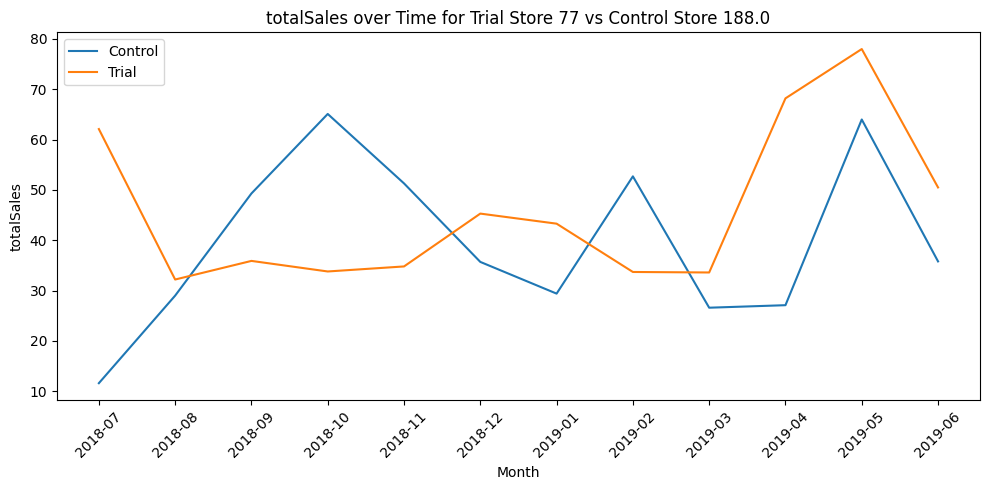

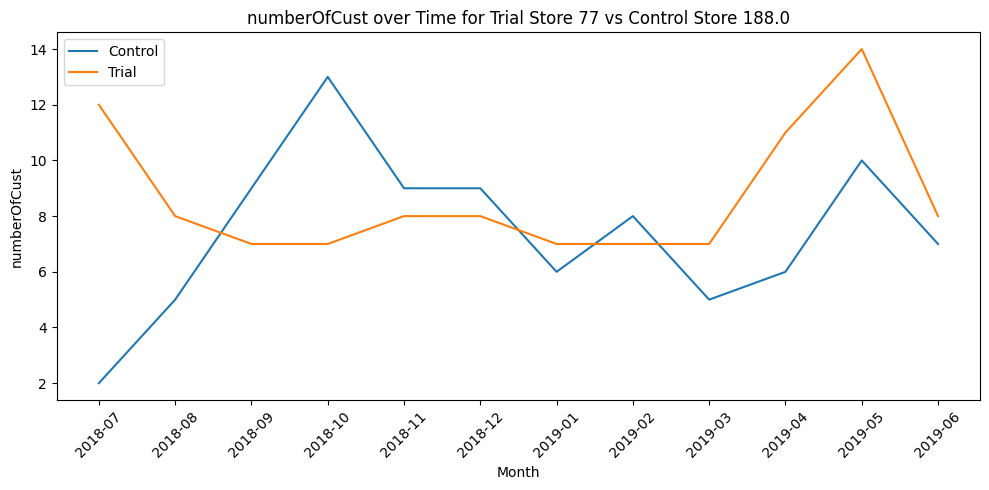

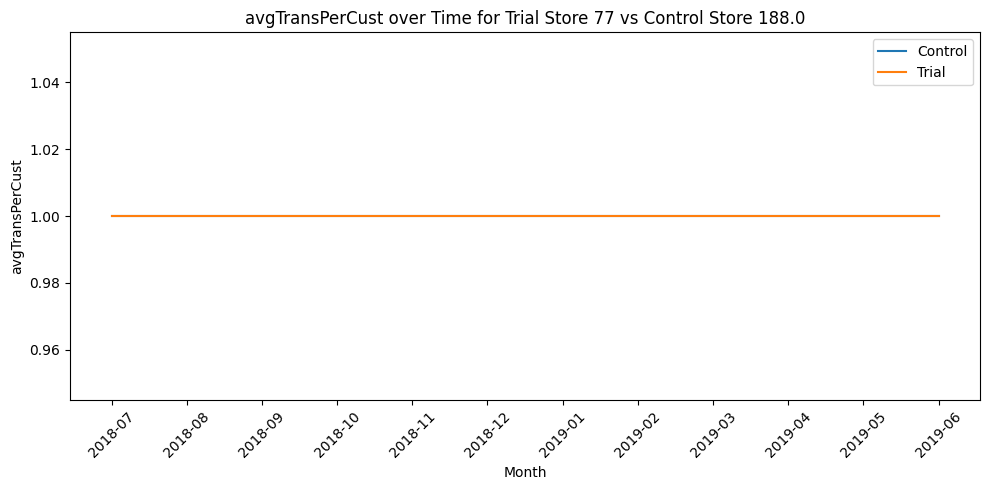

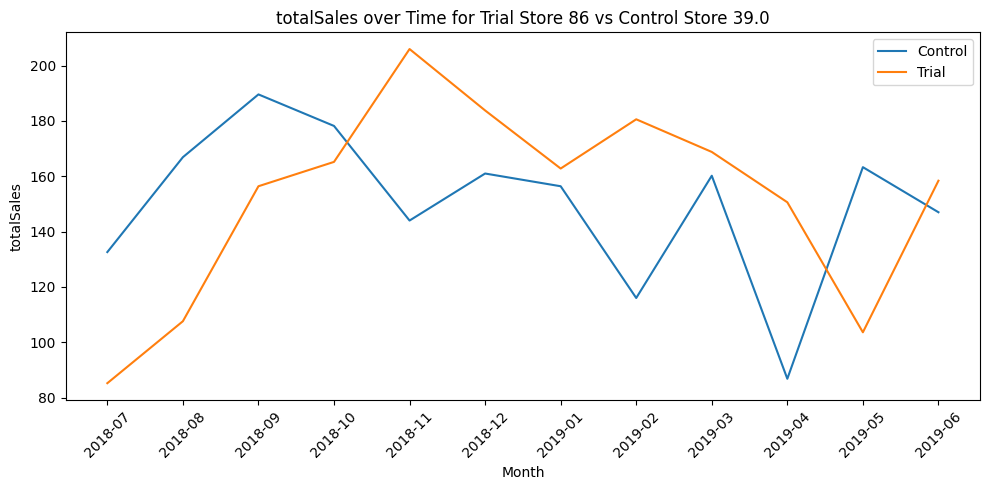

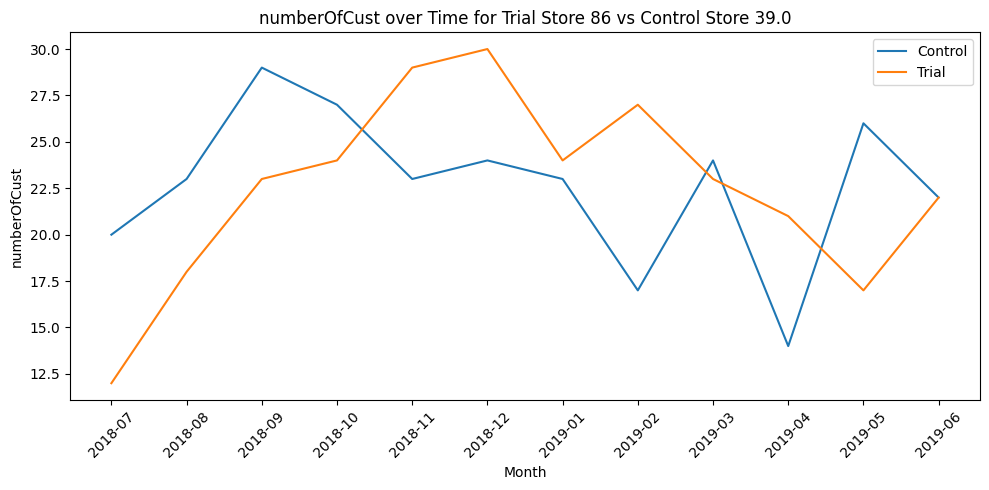

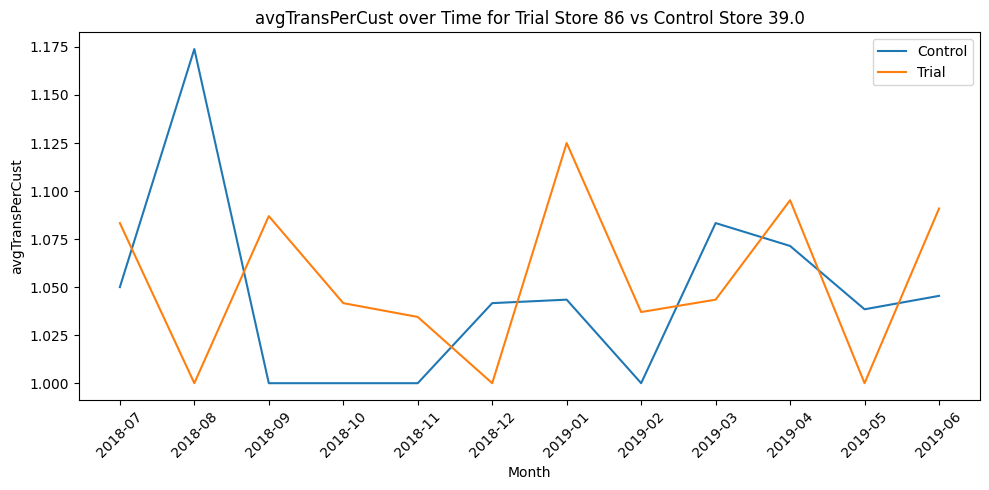

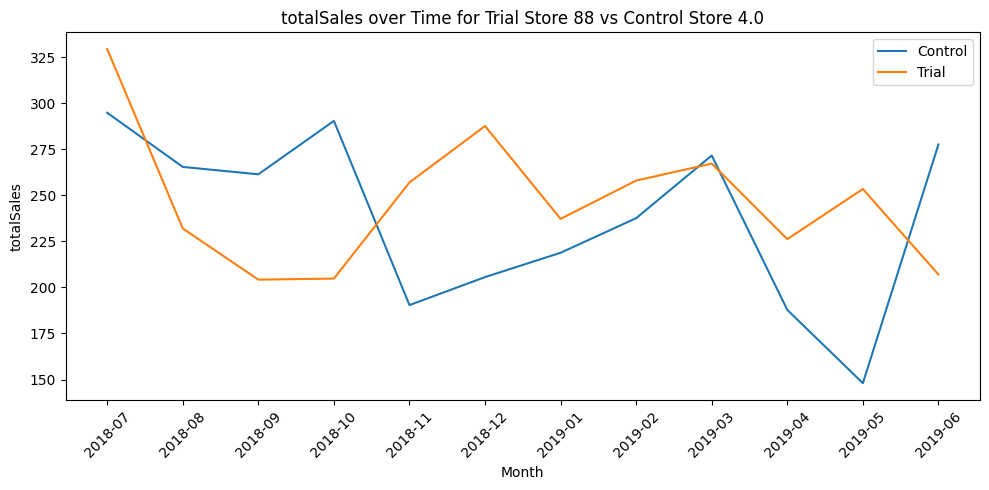

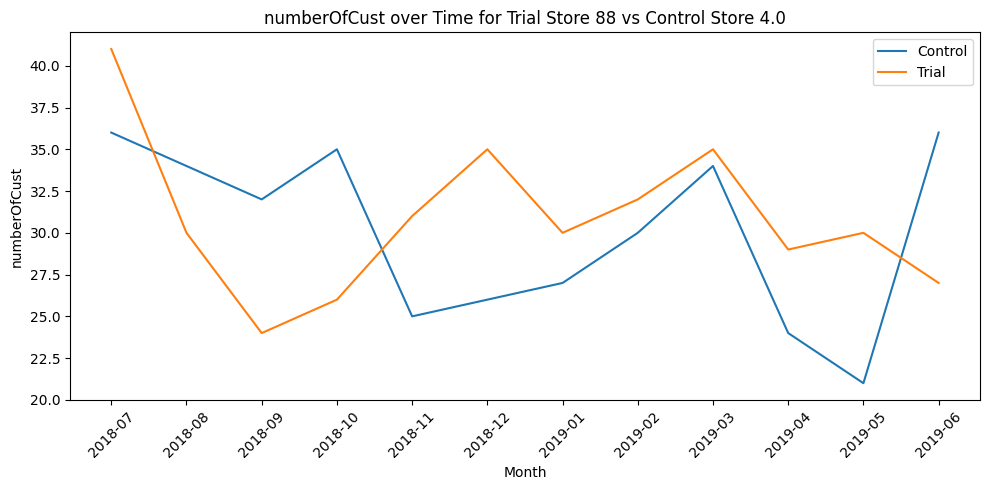

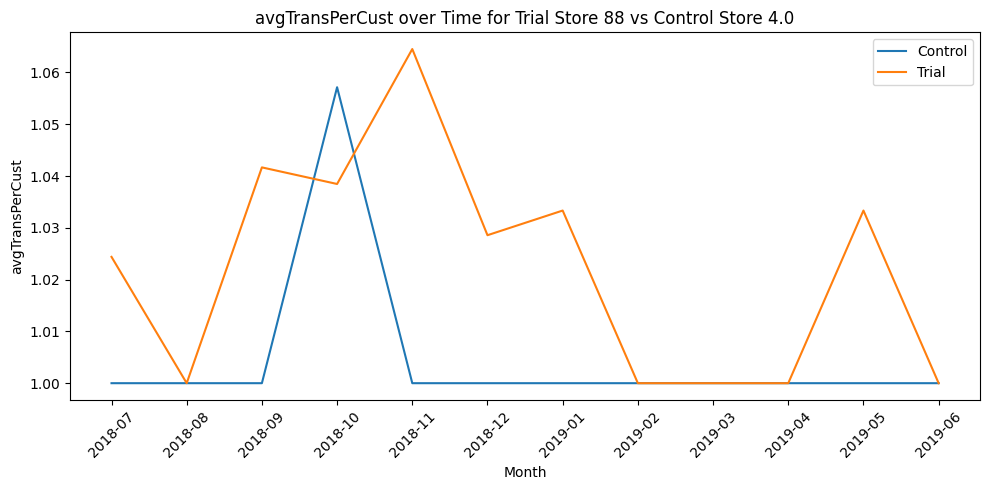

In [30]:
def plot_comparison(trialStore, controlStore, metric):
    # Filter data for the trial and control store
    data = monthlymetrics[
        monthlymetrics['STORE_NBR'].isin([trialStore, controlStore])
    ].copy()

    # Create a column to tag each store as Trial or Control
    data['STORE_TYPE'] = data['STORE_NBR'].apply(
        lambda x: 'Trial' if x == trialStore else 'Control'
    )

    # Plotting
    plt.figure(figsize=(10, 5))
    for label, df_group in data.groupby('STORE_TYPE'):
        plt.plot(df_group['MONTH'].astype(str), df_group[metric], label=label)

    plt.title(f'{metric} over Time for Trial Store {trialStore} vs Control Store {controlStore}')
    plt.xlabel('Month')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
for trial, control in controlMap.items():
    plot_comparison(trial, control, 'totalSales')
    plot_comparison(trial, control, 'numberOfCust')
    plot_comparison(trial, control, 'avgTransPerCust')
